In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816],
                     [8.9], [5.2], [8.59], [2.1], [8],
                     [10], [4.5], [6], [4]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357],
                     [2.6], [1.96], [3.53], [1.76], [3.2],
                     [3.5], [1.6], [2.5], [2.2]],
                    dtype = np.float32)

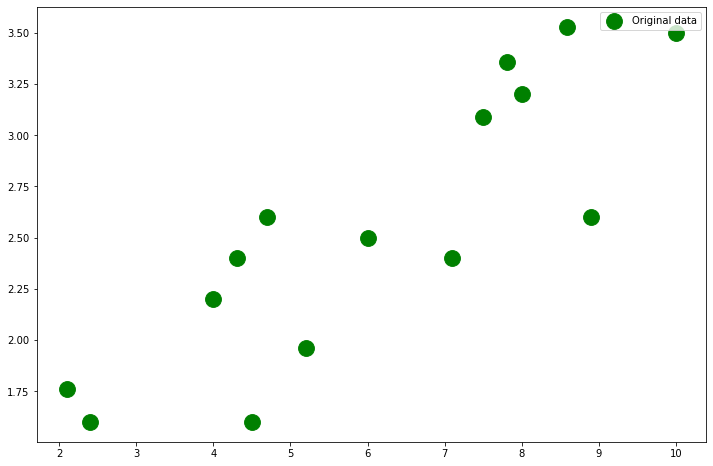

In [3]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')

plt.legend()
plt.show()

In [4]:
import torch

In [5]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [6]:
input_size = 1
hidden_size = 1
output_size = 1

In [7]:
w1 = torch.rand(input_size,
                hidden_size,
               
               requires_grad=True)
w1.shape

torch.Size([1, 1])

In [8]:
w2 = torch.rand(hidden_size,
                output_size,
               
               requires_grad=True)
w2.shape

torch.Size([1, 1])

In [9]:
learning_rate = 1e-6

In [28]:
for iter in range(1, 3000):
    
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter % 50 == 0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 5.071251392364502
100 4.983700752258301
150 4.903599262237549
200 4.830361843109131
250 4.763443946838379
300 4.70233678817749
350 4.646561145782471
400 4.595681667327881
450 4.549294471740723
500 4.507025241851807
550 4.468523025512695
600 4.433467864990234
650 4.401569366455078
700 4.372549533843994
750 4.346161365509033
800 4.322174549102783
850 4.300379276275635
900 4.280585765838623
950 4.262608528137207
1000 4.246290683746338
1050 4.231482028961182
1100 4.218046188354492
1150 4.205859184265137
1200 4.194809436798096
1250 4.184791088104248
1300 4.1757121086120605
1350 4.167486190795898
1400 4.1600341796875
1450 4.153284072875977
1500 4.147172927856445
1550 4.141637325286865
1600 4.136627674102783
1650 4.1320929527282715
1700 4.127989292144775
1750 4.124276638031006
1800 4.120916843414307
1850 4.117879390716553
1900 4.11513090133667
1950 4.112646579742432
2000 4.1103997230529785
2050 4.108367919921875
2100 4.106530666351318
2150 4.1048712730407715
2200 4.10336971282959
2250 4.10

In [29]:
print('w1: ', w1)
print('w2: ', w2)

w1:  tensor([[0.6971]], requires_grad=True)
w2:  tensor([[0.5660]], requires_grad=True)


In [30]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [31]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8545],
        [0.9470],
        [2.9593],
        [2.8014],
        [1.6966],
        [3.0839],
        [3.5116],
        [2.0517],
        [3.3893],
        [0.8286],
        [3.1565],
        [3.9457],
        [1.7756],
        [2.3674],
        [1.5783]], grad_fn=<MmBackward>)

In [32]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8544655 ],
       [0.9469612 ],
       [2.9592535 ],
       [2.801427  ],
       [1.6966388 ],
       [3.083937  ],
       [3.5116477 ],
       [2.0517492 ],
       [3.3893318 ],
       [0.82859105],
       [3.1565373 ],
       [3.9456716 ],
       [1.7755523 ],
       [2.367403  ],
       [1.5782686 ]], dtype=float32)

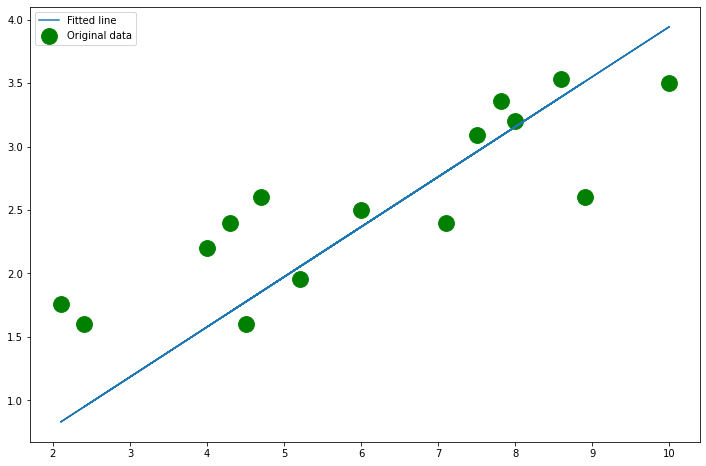

In [33]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label = 'Original data', s=250, c='g')

plt.plot(x_train, predicted, label = 'Fitted line')

plt.legend()

plt.show()